In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [2]:

pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en la salida
# Ruta del archivo
ruta_archivo = r"..\csv\raw\Csv_Todas_Columnas_Limpio.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo, decimal=',', index_col=0)

# Mostrar las primeras filas para comprobar
df.head()

,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,epoc,mut_BRCA1,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,ingresos_mensuales,gastos_salud,deudas,fumador,actividad_fisica,vive,edad,sexo,nivel_educativo,codigo_postal,tipo_empleo_Desempleado,tipo_empleo_Privado,tipo_empleo_Público,tipo_empleo_Temporal,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,ocupacion_Desempleado,ocupacion_Empleado,ocupacion_Jubilado,region_Este,region_Norte,region_Oeste,region_Sur,continente_nacimiento_Antarctica,continente_nacimiento_Asia,continente_nacimiento_Desconocido,continente_nacimiento_Europe,continente_nacimiento_North America,continente_nacimiento_Oceania,continente_nacimiento_South America
glucosa,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.125931,1.116180,0.518919,-0.262543,-0.924342,0.202956,-0.323535,1,1,1,0,1,0,0,0,0,0,0,0,1,1.499543,2.487493,0,1,0.0,1,0.750106,1,1.0,98471,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
-1.549388,-1.768373,-1.357231,0.177002,-0.083060,0.709850,-0.883740,0,0,0,0,0,0,0,0,0,0,0,0,1,2.557298,-0.885562,0,0,1.0,0,-1.028843,0,2.0,23903,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
-0.436864,-0.699218,-2.059947,-0.742047,0.481094,-0.116266,2.570857,0,0,0,0,0,1,0,0,0,0,0,0,0,1.082786,-0.885562,0,1,0.0,1,1.711700,0,0.0,20094,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
-0.258148,0.287809,-0.946194,-0.552243,1.490633,-0.122279,1.030293,1,0,1,1,1,0,0,0,0,1,0,0,0,-0.009775,2.487493,0,1,0.0,0,1.182823,0,1.0,55575,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
-1.940861,-1.565293,-2.566843,-1.161613,1.134325,-0.389633,-0.743689,0,0,0,0,0,0,0,0,0,0,0,0,0,0.011400,-0.885562,0,1,1.0,1,-0.740365,1,3.0,20826,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [21]:
# quiero saber el numero de filas y columnas de df
print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame tiene 50000 filas y 51 columnas.


In [3]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Separar características y etiqueta
X = df.drop(columns='vive')
y = df['vive']

# División y SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),

    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Entrenamiento
history = model.fit(X_train_smote, y_train_smote, epochs=6, batch_size=32,
                    validation_split=0.2, verbose=0)



# Evaluación
test_loss, test_acc = model.evaluate(X_test, y_test)


# Predicciones
y_pred = (model.predict(X_test) >= 0.5).astype(int)

# Reporte
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.3821 - loss: 1.3161
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step
Matriz de confusión:
 [[1069  259]
 [5864 2808]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.15      0.80      0.26      1328
           1       0.92      0.32      0.48      8672

    accuracy                           0.39     10000
   macro avg       0.53      0.56      0.37     10000
weighted avg       0.81      0.39      0.45     10000



In [40]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K

# Definir focal loss
def focal_loss(gamma=2., alpha=0.25):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1. - K.epsilon())
        pt = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        return -K.mean(alpha * K.pow(1. - pt, gamma) * K.log(pt))
    return loss

# Datos
X = df.drop(columns='vive')
y = df['vive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001), loss=focal_loss(), metrics=['accuracy'])

# Entrenamiento con early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_smote, y_train_smote,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluación
test_loss, test_acc = model.evaluate(X_test, y_test)
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba >= 0.5).astype(int)

print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Epoch 1/20
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.5474 - loss: 1.8062 - val_accuracy: 0.0000e+00 - val_loss: 3.9856
Epoch 2/20
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6181 - loss: 1.5223 - val_accuracy: 0.0000e+00 - val_loss: 3.9856
Epoch 3/20
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6230 - loss: 1.5025 - val_accuracy: 0.0000e+00 - val_loss: 3.9856
Epoch 4/20
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6239 - loss: 1.4988 - val_accuracy: 0.0000e+00 - val_loss: 3.9856
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8663 - loss: 0.5327
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step
Matriz de confusión:
 [[   0 1328]
 [   0 8672]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1328
           1       0.87      1.00      0.93      8672

    accuracy                           0.87     10000
   macro avg       0.43      0.50      0.46     10

c:\Users\josit\TERCER CURSO\IA\IA-Casos\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josit\TERCER CURSO\IA\IA-Casos\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josit\TERCER CURSO\IA\IA-Casos\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Matriz de confusión:
 [[   0 1328]
 [   0 8672]]


In [17]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.optimizers import Adam


# Separar características y etiqueta
X = df.drop(columns='vive')
y = df['vive']

# División y SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),

    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# Entrenamiento
history = model.fit(X_train_smote, y_train_smote, epochs=8, batch_size=26,
                    validation_split=0.2, verbose=0)



# Evaluación
test_loss, test_acc = model.evaluate(X_test, y_test)


# Predicciones
y_pred = (model.predict(X_test) >= 0.5).astype(int)

# Reporte
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.8629 - loss: 0.7827
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
Matriz de confusión:
 [[  67 1261]
 [  96 8576]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.41      0.05      0.09      1328
           1       0.87      0.99      0.93      8672

    accuracy                           0.86     10000
   macro avg       0.64      0.52      0.51     10000
weighted avg       0.81      0.86      0.82     10000



In [10]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

# Separar características y etiqueta
X = df.drop(columns='vive')
y = df['vive']

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Calcular class weights para el test desequilibrado
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weights = dict(enumerate(weights))

# Red neuronal ajustada
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# Entrenamiento
history = model.fit(X_train_smote, y_train_smote,
                    epochs=6, batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weights,
                    verbose=0)

# Evaluación
test_loss, test_acc, test_auc = model.evaluate(X_test, y_test)

# Predicciones
y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)

# Reportes
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))

(test_loss, test_acc, test_auc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8633 - auc: 0.5088 - loss: 8.2235  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
Matriz de confusión:
 [[  12 1271]
 [  21 8696]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.36      0.01      0.02      1283
           1       0.87      1.00      0.93      8717

    accuracy                           0.87     10000
   macro avg       0.62      0.50      0.47     10000
weighted avg       0.81      0.87      0.81     10000

AUC: 0.5257156016352419


(7.79653263092041, 0.8708000183105469, 0.5081532001495361)

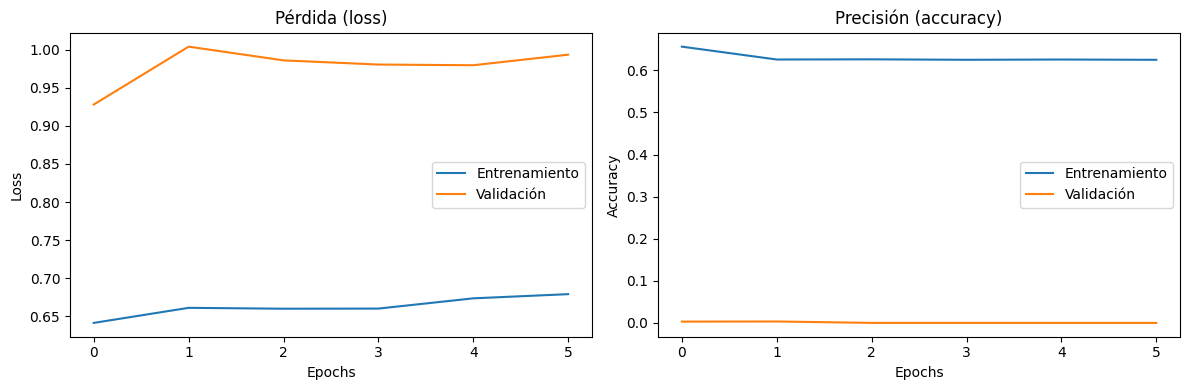

In [7]:
import matplotlib.pyplot as plt

# Entrenamiento
history = model.fit(X_train_smote, y_train_smote, epochs=6, batch_size=32,
                    validation_split=0.2, verbose=0)

# --- Añade esto para visualizar ---
plt.figure(figsize=(12, 4))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión (accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix

# Separar características y etiqueta
X = df.drop(columns='vive')
y = df['vive']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calcular class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = dict(enumerate(class_weights))

# Construcción del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilación con Focal Loss
model.compile(optimizer='adam',
              loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=0.25, gamma=2.0),
              metrics=['accuracy'])

# Entrenamiento
history = model.fit(X_train, y_train, epochs=5, batch_size=16,
                    validation_split=0.2, class_weight=class_weights, verbose=0)

# Evaluación
test_loss, test_acc = model.evaluate(X_test, y_test)

# Predicciones
y_pred = (model.predict(X_test) >= 0.5).astype(int)

# Reporte
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


c:\Users\josit\TERCER CURSO\IA\IA-Casos\env\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\josit\TERCER CURSO\IA\IA-Casos\env\Lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.19.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file

ModuleNotFoundError: No module named 'keras.src.engine'

In [ ]:
# Aquí asume que ya tienes X_train_smote, y_train_smote definidos con SMOTE

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_smote.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_smote, y_train_smote, epochs=5, batch_size=16,
                    validation_split=0.2, verbose=0)

test_loss, test_acc = model.evaluate(X_test, y_test)

y_pred = (model.predict(X_test) >= 0.5).astype(int)

print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step


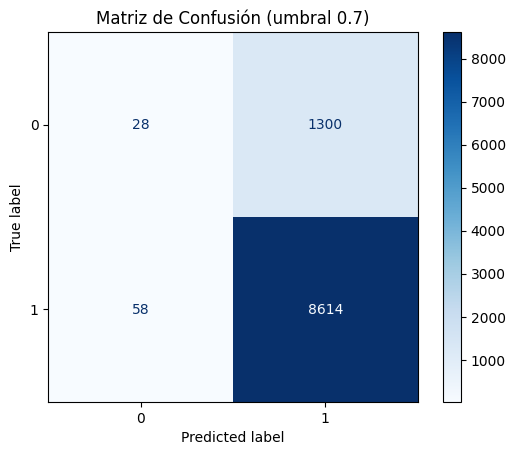

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predecir probabilidades
y_probs = model.predict(X_test)

# Aplicar un umbral más alto, por ejemplo 0.7 en vez de 0.5
y_pred = (y_probs >= 0.9).astype(int)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión (umbral 0.7)")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step


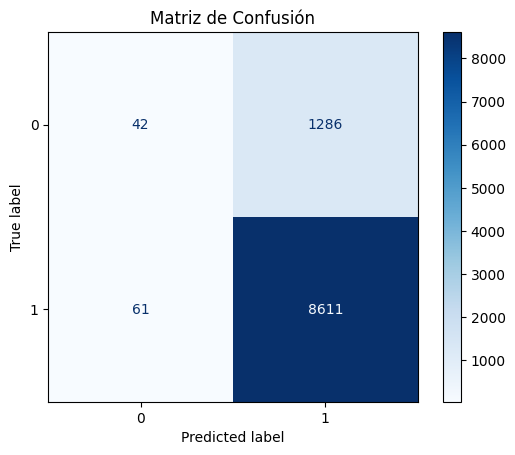

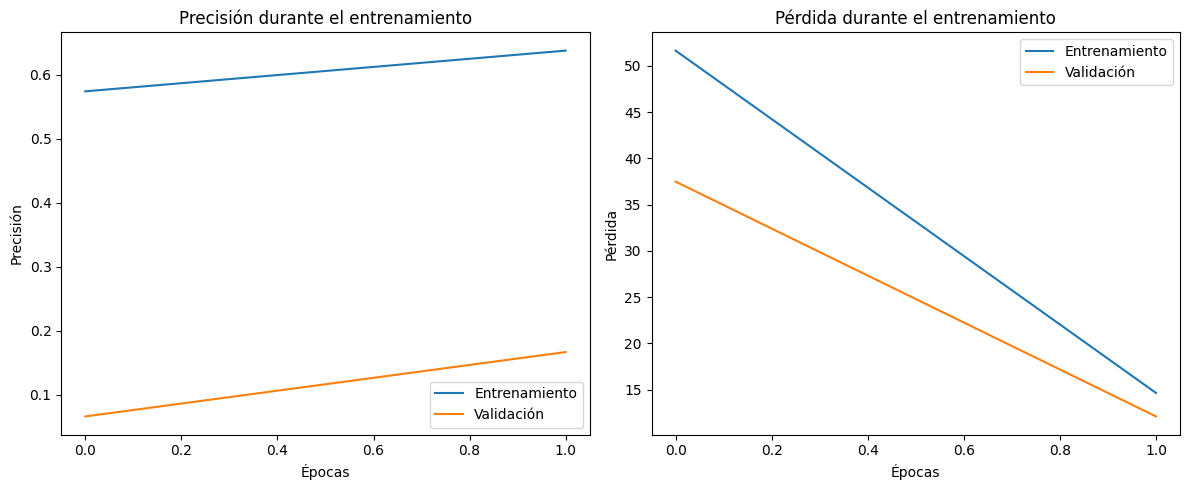

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicciones
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob >= 0.7).astype(int)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión")
plt.show()

# Historial de entrenamiento
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()
